<a href="https://colab.research.google.com/github/Vineeshchowdary6826/NLP-Excel-R/blob/master/17_02_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
  df = pd.read_csv("/content/emotion.csv")

In [4]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


<Axes: xlabel='label', ylabel='count'>

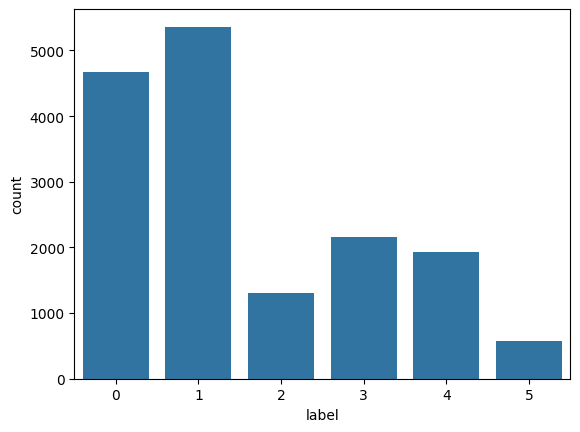

In [5]:
import seaborn as sns
sns.countplot(x=df.label)

In [6]:
df.isna().sum()

,0
text,0
label,0


In [7]:
df['text']=df['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [19]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
df['text'] = df['text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

,text
0,didnt feel humiliated
1,go feeling hopeless damned hopeful around some...
2,im grabbing minute post feel greedy wrong
3,ever feeling nostalgic fireplace know still pr...
4,feeling grouchy


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])
X = X.toarray()
y = df.label.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, \
test_size=0.2, shuffle=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, \
test_size=0.2, shuffle=True)

In [23]:
from sklearn.naive_bayes import GaussianNB

#Initialize GaussianNB classifier
model = GaussianNB() # Changed GaussianNBO to GaussianNB()
#Fit the model on the train dataset
model = model.fit(X_train, y_train)
#Make predictions on the test dataset
pred = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

Accuracy: 35.0 %


In [26]:
from sklearn.ensemble import RandomForestClassifier
#Create a random forest classifier, 100 trees
clf_rf=RandomForestClassifier()

In [27]:
#Train the model using the training sets
clf_rf.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
rf_pred=clf_rf.predict(X_test).astype(int)

In [29]:
print("Accuracy:",accuracy_score(y_test, rf_pred))

Accuracy: 0.8803125


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[862  33   6  27  17   1]
 [ 30 951  25   6   8   1]
 [  2  76 209   5   3   1]
 [ 19  27   2 366  12   1]
 [ 12  15   1  13 345  11]
 [  4   7   1   0  17  84]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       946
           1       0.86      0.93      0.89      1021
           2       0.86      0.71      0.77       296
           3       0.88      0.86      0.87       427
           4       0.86      0.87      0.86       397
           5       0.85      0.74      0.79       113

    accuracy                           0.88      3200
   macro avg       0.87      0.84      0.85      3200
weighted avg       0.88      0.88      0.88      3200



In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[845  29  12  32  22   6]
 [ 20 910  70   6   6   9]
 [  0  19 268   3   4   2]
 [ 12  11   3 385  13   3]
 [ 13  12   2  17 328  25]
 [  3   1   0   0  12  97]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       946
           1       0.93      0.89      0.91      1021
           2       0.75      0.91      0.82       296
           3       0.87      0.90      0.89       427
           4       0.85      0.83      0.84       397
           5       0.68      0.86      0.76       113

    accuracy                           0.89      3200
   macro avg       0.84      0.88      0.86      3200
weighted avg       0.89      0.89      0.89      3200

